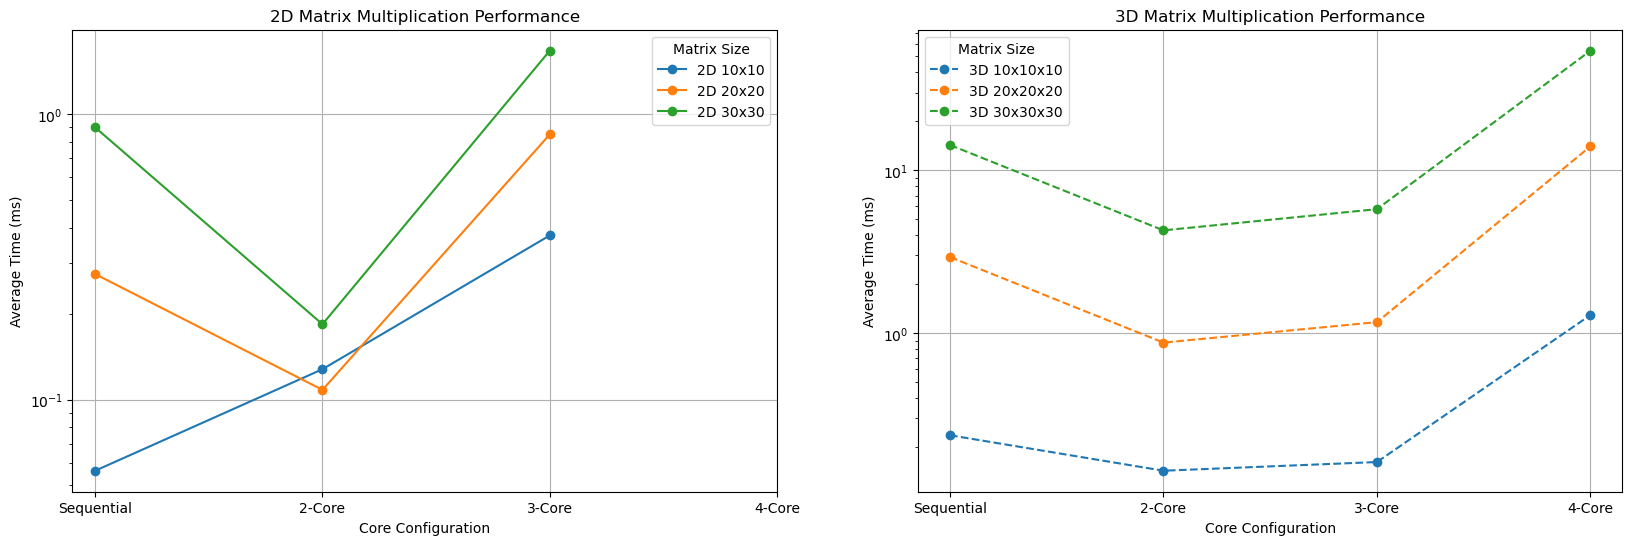

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV, assuming the first row is the header
data_df = pd.read_csv('results.csv')

# Convert time from nanoseconds to milliseconds
data_df[['Sequential', '2-Core', '3-Core', '4-Core']] = data_df[['Sequential', '2-Core', '3-Core', '4-Core']] / 1e6

# Define core configurations
cores = ['Sequential', '2-Core', '3-Core', '4-Core']

# Initialize the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot 2D data
for dimension in data_df[data_df['Type'] == '2D']['Dimension'].unique():
    data_2d_current = data_df[(data_df['Type'] == '2D') & (data_df['Dimension'] == dimension)]
    if not data_2d_current.empty:
        y_2d = data_2d_current[['Sequential', '2-Core', '3-Core']].iloc[0]
        axs[0].plot(cores[:3], y_2d, marker='o', label=f'2D {dimension}x{dimension}')

# Plot 3D data
for dimension in data_df[data_df['Type'] == '3D']['Dimension'].unique():
    data_3d_current = data_df[(data_df['Type'] == '3D') & (data_df['Dimension'] == dimension)]
    if not data_3d_current.empty:
        y_3d = data_3d_current[['Sequential', '2-Core', '3-Core', '4-Core']].iloc[0]
        axs[1].plot(cores, y_3d, marker='o', linestyle='--', label=f'3D {dimension}x{dimension}x{dimension}')

# Configure the subplots
for ax in axs:
    ax.set_xlabel('Core Configuration')
    ax.set_ylabel('Average Time (ms)')
    ax.set_yscale('log')
    ax.set_xticks(cores)
    ax.grid(True)

axs[0].set_title('2D Matrix Multiplication Performance')
axs[1].set_title('3D Matrix Multiplication Performance')
axs[0].legend(title="Matrix Size")
axs[1].legend(title="Matrix Size")

plt.show()
